# 🧬 Microbes Predictor

In this notebook, we will transition from health experts to microbioligists to save lives. The reality of life is that sadly, it takes more than 24 h to grow up the bacteria recovered from the blood of an infected patient, identify the species, and then determine to which antibiotics the organism is resistant, leading to a very high mortality rate for such infections. 

Our goal in this notebook is to instantly identify the microbe using machine learning given extracted features about them. Our classes include the following ten microbes  (`Spirogyra`, `Volvox`, `Pithophora`, `Yeast`, `Raizopus`, `Penicillum`, `Aspergillus sp`, `Protozoa`, `Diatom`, `Ulothrix`).

Our dataset have over 24K observations to help us learn to classify the microbes based on some meaningful features that you can read more about [here](https://www.kaggle.com/datasets/sayansh001/microbes-dataset).

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

#### Data Ingestion

TODO 1: Download the dataset from [Kaggle](https://www.kaggle.com/datasets/sayansh001/microbes-dataset) and rename it into `microbes.csv` and manually put `Serial` as the name of the first column.

In [18]:
dataset = pd.read_csv('microbes.csv')

dataset.head(10)

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.1500,22.3,2.97,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.6000,22.5,5.41,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.0000,22.4,5.96,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.9400,21.9,8.81,...,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.5800,11.9,10.20,...,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
5,5,9.47,18.4,4.27,14.60,0.400,7.29,20.1000,22.5,13.60,...,13.60,1.080,1.070,0.963,0.1360,14.10,15.50,0.812,7.99,Spirogyra
6,6,13.50,19.8,4.50,17.30,0.493,9.67,0.0334,22.2,16.80,...,16.90,1.170,0.981,0.381,0.1070,17.20,7.88,0.903,7.99,Spirogyra
7,7,15.60,19.6,4.16,19.60,0.352,12.10,0.6270,22.3,19.30,...,19.30,0.979,0.845,0.328,0.0789,19.50,12.30,0.771,7.99,Spirogyra
8,8,8.95,20.0,8.59,3.28,1.520,5.50,9.0800,21.1,1.20,...,1.22,2.770,2.260,3.420,0.5760,3.32,11.60,3.240,9.69,Spirogyra
9,9,11.20,17.4,3.53,4.33,0.332,8.37,14.7000,22.6,3.60,...,3.60,0.896,0.966,0.347,0.0801,4.13,9.27,0.560,9.69,Spirogyra


#### Data Cleaning

In [19]:
num_missing_vals = dataset.isnull().sum().sum()
print(f"Number of missing values: {num_missing_vals}")

Number of missing values: 0


#### Split the Dataset

In [24]:
# column split
x_data = dataset.drop(columns=['Unnamed: 0','microorganisms'])     # Serial is ID and microorganisms is target
x_data = x_data.iloc[:, :10]                                    # First ten features contain enough information
y_data = dataset['microorganisms']                              # Target variable

# train-test split
x_data, y_data = x_data.to_numpy(), y_data.to_numpy()
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

#### Exploratory Analysis

<BarContainer object of 10 artists>

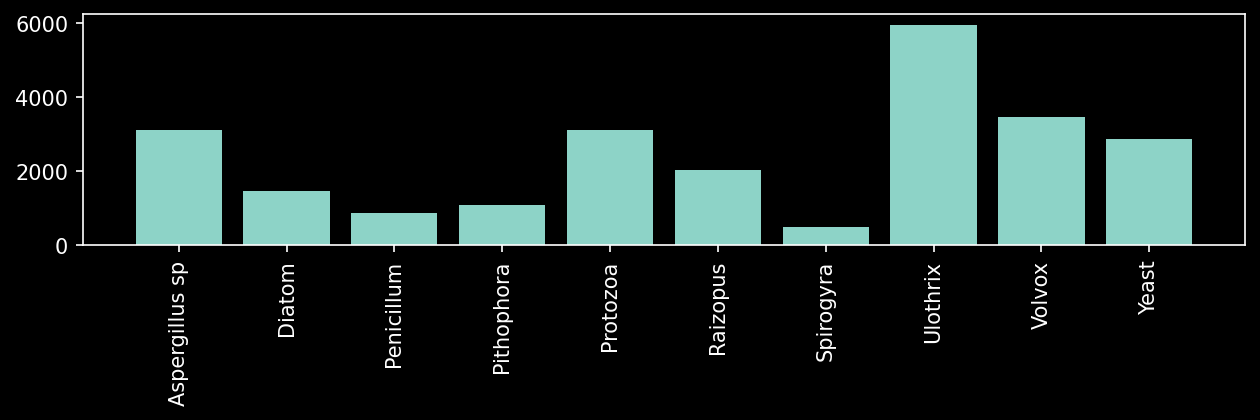

In [26]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 2), dpi=150)
plt.xticks(rotation=90)
labels, counts = np.unique(y_train, return_counts=True)
plt.bar(labels, counts, align='center')

## 😎 Put on Your Machine Learning Engineer Goggles

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from BayesClassifier import BayesClassifier
from KDEstimator import KDEstimator

### Gaussian Naive Bayes

In [28]:
# Initiate
gnb_model = BayesClassifier(mode='GNB')
# Fit
gnb_model.fit(x_train, y_train)
# Predict
gnb_y_pred = gnb_model.predict(x_val)
# Evalute
gnb_accuracy = gnb_model.score(x_val, y_val)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)

Gaussian Naive Bayes Accuracy: 0.2601


<img src="https://media1.tenor.com/m/P1kvseQ5INIAAAAd/blank-stare-really.gif" width="200"/>

#### Linear Discriminant Analysis

In [29]:
# Initiate
lda_model = BayesClassifier(mode='LDA')
# Fit
lda_model.fit(x_train, y_train)
# Predict
lda_y_pred = lda_model.predict(x_val)
# Evaluate
lda_accuracy = lda_model.score(x_val, y_val)
print("Linear Discriminant Analysis Accuracy:", lda_accuracy)

Linear Discriminant Analysis Accuracy: 0.3744


<img src="https://media1.tenor.com/m/lL6lmpGAtSwAAAAd/cat-kid-retekmacska.gif" width=200/>

#### Quadratic Discriminant Analysis

In [30]:
qda_model = BayesClassifier(mode='QDA')
qda_model.fit(x_train, y_train)
qda_y_pred = qda_model.predict(x_val)
qda_accuracy = qda_model.score(x_val, y_val)
print("Quadratic Discriminant Analysis Accuracy:", qda_accuracy)

Quadratic Discriminant Analysis Accuracy: 0.3413


<img src="https://media1.tenor.com/m/AFKVFcP5to8AAAAd/julesmaru-really.gif" width="250"/>

#### Kernel Density Estimation

In [38]:
# TODO 2: Call KDEstimator with Gauss bump and bandwidth=0.5
kde_config = KDEstimator(bump='Gauss', bandwidth=1)
# TODO 3: Call BayesClassifier in KDE mode and pass it that instance
kde_model = BayesClassifier(mode='KDE', kde_config=kde_config)
kde_model.fit(x_train, y_train)
kde_y_pred = kde_model.predict(x_val)
kde_accuracy = kde_model.score(x_val, y_val)
print("Bayes Classifier with KDE Accuracy:", kde_accuracy)

Bayes Classifier with KDE Accuracy: 0.9694


<img src="https://media1.tenor.com/m/QxqYH15_UxYAAAAd/wow-omg.gif" width="250">

#### 1. Explain why all three of GNB, LDA, QDA performed much worse than KDE:
    
    this is mainly due to the assumstion of the first three models that the features are normally distributed, which is not the case in our dataset.
    still, do not know how LDA is better than QDA in this case.?? 

In [ ]:
'''
Answer goes here. You can use the same argument to explain why LDA was better than QDA.
'''

#### 2. Why is Bayes Classifier with KDE much slower than Bayes Classifier with normality assumption. Explain in light of the inference complexity for both (even if roughly):

assuming naive approach(not using numpy)
* Bayes Classifier with KDE:
    - assuming having ***N features*** ana M data points
    - For each data point, KDE involves evaluating the kernel     
    function at every other data point to estimate the density at that point. If there are M data points, this operation needs to be performed for each data point.

    - Assuming a naive approach(not using numpy ), where each evaluation takes `O(M)` time, the overall complexity in one dimention becomes `O(M^2)` , so applying this to N dimentions, the overall complexity becomes `O(M^2 * N)`
* Bayes Classifier with normality assumption:
    - Assuming having ***N features*** and ***M data points***
    - calculating the p(x|c) is done by evaluating the normal distribution function at each data point, which takes `O(N)` time, so the overall complexity becomes `O(N * M)`

In [ ]:
'''
Answer goes here
'''

#### 3. Deduce why the performance does not get better when Silverman bandwidth is used

Silverman  can yield widely inaccurate estimates when the density is not close to being normal. (still not sure why ?? )

In [ ]:
'''
Answer goes here. 
This may help https://en.wikipedia.org/wiki/Kernel_density_estimation#A_rule-of-thumb_bandwidth_estimator
'''

#### [Extra] Try to exceed the current KDE accuracy by trying different hyperparameters (bandwidth or bump)